In [1]:
import pandas as pd

# List of file paths
csv_files = [
    r"C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Revenue.csv",
    r"C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Dividend_Yield.csv",
    r"C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Earnings.csv",
    r"C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Market_Cap.csv",
    r"C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_P_E_ratio.csv"
]

# Load each CSV into DataFrames
df_dict = {file: pd.read_csv(file) for file in csv_files}

# Inspect the first few rows of each DataFrame
for key, df in df_dict.items():
    print(f"Data from {key}:")
    print(df.head(), "\n")


Data from C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Revenue.csv:
   Rank          Name     Symbol   revenue_ttm  price (GBP)        country
0     1       Walmart        WMT  665035000000    61.029186  United States
1     2        Amazon       AMZN  604334000000   143.454209  United States
2     3  Saudi Aramco    2222.SR  495354806850     5.505405   Saudi Arabia
3     4       Sinopec  600028.SS  435696880608     0.748295          China
4     5    PetroChina  601857.SS  429671599508     0.969769          China 

Data from C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Dividend_Yield.csv:
   Rank                     Name    Symbol  dividend_yield_ttm  price (GBP)  \
0     1                  LianBio      LIAN            300940.0     0.243065   
1     2           Richter Gedeon    RIG2.F            150430.0    23.726825   
2     3              Delek Group  DLEKG.TA            117114.0    87.735884   
3     4  LMP Au

In [2]:
for key, df in df_dict.items():
    print(f"Missing values in {key}:")
    print(df.isnull().sum(), "\n")


Missing values in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Revenue.csv:
Rank           0
Name           0
Symbol         1
revenue_ttm    0
price (GBP)    0
country        2
dtype: int64 

Missing values in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Dividend_Yield.csv:
Rank                  0
Name                  0
Symbol                1
dividend_yield_ttm    0
price (GBP)           0
country               2
dtype: int64 

Missing values in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Earnings.csv:
Rank            0
Name            0
Symbol          1
earnings_ttm    0
price (GBP)     0
country         2
dtype: int64 

Missing values in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Market_Cap.csv:
Rank           0
Name           0
Symbol         1
marketcap      0
price (GBP)    0
country        2
dtype: int64 

Missing values in C:\

In [3]:
# Fill missing values with 0 for simplicity
for key, df in df_dict.items():
    df_dict[key] = df.fillna(0)


In [4]:
# Standardize the column names (ensure there's a common key, e.g., 'Symbol')
for key, df in df_dict.items():
    print(f"Columns in {key}: {df.columns.tolist()}")

# Rename column if needed to align
# For example, if one DataFrame uses 'Company' and another uses 'Symbol', rename them to match
for key, df in df_dict.items():
    df_dict[key] = df.rename(columns={"Company": "Symbol"})  # Adjust this based on the inspection above


Columns in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Revenue.csv: ['Rank', 'Name', 'Symbol', 'revenue_ttm', 'price (GBP)', 'country']
Columns in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Dividend_Yield.csv: ['Rank', 'Name', 'Symbol', 'dividend_yield_ttm', 'price (GBP)', 'country']
Columns in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Earnings.csv: ['Rank', 'Name', 'Symbol', 'earnings_ttm', 'price (GBP)', 'country']
Columns in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_Market_Cap.csv: ['Rank', 'Name', 'Symbol', 'marketcap', 'price (GBP)', 'country']
Columns in C:\Users\knigh\OneDrive\Documents\Hyper Island python project\Companies_ranked_by_P_E_ratio.csv: ['Rank', 'Name', 'Symbol', 'pe_ratio_ttm', 'price (GBP)', 'country']


In [6]:
# Merge the DataFrames on 'Symbol' with different suffixes for overlapping columns
merged_data = df_dict[csv_files[0]].merge(df_dict[csv_files[1]], on='Symbol', how='outer', suffixes=('_rev', '_div')) \
                                  .merge(df_dict[csv_files[2]], on='Symbol', how='outer', suffixes=('', '_earn')) \
                                  .merge(df_dict[csv_files[3]], on='Symbol', how='outer', suffixes=('', '_mcap')) \
                                  .merge(df_dict[csv_files[4]], on='Symbol', how='outer', suffixes=('', '_pe'))

# Inspect the merged DataFrame
print(merged_data.shape)
print(merged_data.head())



(9912, 26)
   Rank_rev      Name_rev     Symbol   revenue_ttm  price (GBP)_rev  \
0         1       Walmart        WMT  665035000000        61.029186   
1         2        Amazon       AMZN  604334000000       143.454209   
2         3  Saudi Aramco    2222.SR  495354806850         5.505405   
3         4       Sinopec  600028.SS  435696880608         0.748295   
4         5    PetroChina  601857.SS  429671599508         0.969769   

     country_rev  Rank_div      Name_div  dividend_yield_ttm  price (GBP)_div  \
0  United States      3704       Walmart             99.7744        61.010137   
1  United States      4606        Amazon              0.0000       143.477068   
2   Saudi Arabia      2468  Saudi Aramco            236.3260         5.505405   
3          China      2740       Sinopec            203.1610         0.748295   
4          China      1054    PetroChina            475.6980         0.969769   

   ... Rank_mcap     Name_mcap     marketcap  price (GBP)_mcap   country_mc

In [7]:
print(merged_data.columns)


Index(['Rank_rev', 'Name_rev', 'Symbol', 'revenue_ttm', 'price (GBP)_rev',
       'country_rev', 'Rank_div', 'Name_div', 'dividend_yield_ttm',
       'price (GBP)_div', 'country_div', 'Rank', 'Name', 'earnings_ttm',
       'price (GBP)', 'country', 'Rank_mcap', 'Name_mcap', 'marketcap',
       'price (GBP)_mcap', 'country_mcap', 'Rank_pe', 'Name_pe',
       'pe_ratio_ttm', 'price (GBP)_pe', 'country_pe'],
      dtype='object')


In [8]:
merged_data.drop_duplicates(inplace=True)


In [9]:
merged_data.fillna(0, inplace=True)


In [11]:
# Check the current columns in the merged DataFrame
print(merged_data.columns)

# Assuming you find that the revenue column is named 'revenue_ttm'
# Rename columns for easier access (modify based on your actual column names)
merged_data.rename(columns={
    'revenue_ttm': 'Revenue',
    'dividend_yield_ttm': 'Dividend_Yield',
    'earnings_ttm': 'Earnings',
    'marketcap': 'Market_Cap',
    'pe_ratio_ttm': 'P_E_Ratio'
}, inplace=True)

# After renaming, check to ensure the new names are set correctly
print(merged_data.columns)

# Convert relevant columns to numeric types if they are not already
merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')
merged_data['Dividend_Yield'] = pd.to_numeric(merged_data['Dividend_Yield'], errors='coerce')
merged_data['Earnings'] = pd.to_numeric(merged_data['Earnings'], errors='coerce')
merged_data['Market_Cap'] = pd.to_numeric(merged_data['Market_Cap'], errors='coerce')
merged_data['P_E_Ratio'] = pd.to_numeric(merged_data['P_E_Ratio'], errors='coerce')


Index(['Rank_rev', 'Name_rev', 'Symbol', 'revenue_ttm', 'price (GBP)_rev',
       'country_rev', 'Rank_div', 'Name_div', 'dividend_yield_ttm',
       'price (GBP)_div', 'country_div', 'Rank', 'Name', 'earnings_ttm',
       'price (GBP)', 'country', 'Rank_mcap', 'Name_mcap', 'marketcap',
       'price (GBP)_mcap', 'country_mcap', 'Rank_pe', 'Name_pe',
       'pe_ratio_ttm', 'price (GBP)_pe', 'country_pe'],
      dtype='object')
Index(['Rank_rev', 'Name_rev', 'Symbol', 'Revenue', 'price (GBP)_rev',
       'country_rev', 'Rank_div', 'Name_div', 'Dividend_Yield',
       'price (GBP)_div', 'country_div', 'Rank', 'Name', 'Earnings',
       'price (GBP)', 'country', 'Rank_mcap', 'Name_mcap', 'Market_Cap',
       'price (GBP)_mcap', 'country_mcap', 'Rank_pe', 'Name_pe', 'P_E_Ratio',
       'price (GBP)_pe', 'country_pe'],
      dtype='object')


In [12]:
merged_data.rename(columns={
    'revenue_ttm': 'Revenue',
    'dividend_yield_ttm': 'Dividend_Yield',
    'earnings_ttm': 'Earnings',
    'marketcap': 'Market_Cap',
    'pe_ratio_ttm': 'P_E_Ratio'
}, inplace=True)


In [13]:
# Convert relevant columns to numeric types
merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')
merged_data['Dividend_Yield'] = pd.to_numeric(merged_data['Dividend_Yield'], errors='coerce')
merged_data['Earnings'] = pd.to_numeric(merged_data['Earnings'], errors='coerce')
merged_data['Market_Cap'] = pd.to_numeric(merged_data['Market_Cap'], errors='coerce')
merged_data['P_E_Ratio'] = pd.to_numeric(merged_data['P_E_Ratio'], errors='coerce')


In [14]:
# Check for missing values
print(merged_data.isnull().sum())

# You can drop rows with missing values or fill them
merged_data.dropna(inplace=True)  # This drops any rows with missing values
# or you can fill them like this:
# merged_data.fillna(0, inplace=True)


Rank_rev            0
Name_rev            0
Symbol              0
Revenue             0
price (GBP)_rev     0
country_rev         0
Rank_div            0
Name_div            0
Dividend_Yield      0
price (GBP)_div     0
country_div         0
Rank                0
Name                0
Earnings            0
price (GBP)         0
country             0
Rank_mcap           0
Name_mcap           0
Market_Cap          0
price (GBP)_mcap    0
country_mcap        0
Rank_pe             0
Name_pe             0
P_E_Ratio           0
price (GBP)_pe      0
country_pe          0
dtype: int64


In [15]:
print(merged_data.describe())


          Rank_rev       Revenue  price (GBP)_rev     Rank_div  \
count  9912.000000  9.912000e+03      9912.000000  9912.000000   
mean   4956.500000  5.708766e+09        53.464434  4956.500000   
std    2861.492268  2.293079e+10       359.779035  2861.492268   
min       1.000000 -3.922776e+10         0.000000     1.000000   
25%    2478.750000  1.191801e+08         2.005837  2478.750000   
50%    4956.500000  6.672010e+08         8.551325  4956.500000   
75%    7434.250000  3.151069e+09        28.819232  7434.250000   
max    9912.000000  6.650350e+11     16549.695004  9912.000000   

       Dividend_Yield  price (GBP)_div         Rank      Earnings  \
count     9912.000000      9912.000000  9912.000000  9.912000e+03   
mean       240.548787        53.464035  4956.500000  7.112681e+08   
std       3761.391539       359.778840  2861.492268  4.203526e+09   
min          0.000000         0.000000     1.000000 -1.730700e+10   
25%          0.000000         2.005837  2478.750000 -4.53380

In [22]:
# Convert relevant columns to numeric types, forcing errors to NaN
merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')
merged_data['Earnings'] = pd.to_numeric(merged_data['Earnings'], errors='coerce')
merged_data['Market_Cap'] = pd.to_numeric(merged_data['Market_Cap'], errors='coerce')
merged_data['Dividend_Yield'] = pd.to_numeric(merged_data['Dividend_Yield'], errors='coerce')

# Check for NaN values again after conversion
print(merged_data[['Revenue', 'Earnings', 'Market_Cap', 'Dividend_Yield']].isnull().sum())



Revenue           0
Earnings          0
Market_Cap        0
Dividend_Yield    0
dtype: int64


In [18]:
correlation_matrix = merged_data[['Revenue', 'Earnings', 'Market_Cap', 'P_E_Ratio']].corr()
print(correlation_matrix)


             Revenue  Earnings  Market_Cap  P_E_Ratio
Revenue     1.000000  0.672930    0.548257   0.001217
Earnings    0.672930  1.000000    0.777601   0.000873
Market_Cap  0.548257  0.777601    1.000000   0.000366
P_E_Ratio   0.001217  0.000873    0.000366   1.000000


In [19]:
country_analysis = merged_data.groupby('country').agg({
    'Revenue': 'mean',
    'Market_Cap': 'mean',
    'Dividend_Yield': 'mean'
}).reset_index()
print(country_analysis)


                 country       Revenue    Market_Cap  Dividend_Yield
0                      0  1.356476e+10  4.887787e+09      132.708500
1              Argentina  3.403506e+09  6.714590e+09      183.213986
2              Australia  1.909929e+09  3.926408e+09       95.099994
3                Austria  3.359665e+09  2.076770e+09      255.457555
4                Bahamas  4.235970e+08  6.660019e+08        0.000000
..                   ...           ...           ...             ...
75  United Arab Emirates  4.634556e+08  5.241986e+09       84.987099
76        United Kingdom  5.803009e+09  6.893915e+09      163.300193
77         United States  5.869965e+09  1.204079e+10      268.519583
78               Uruguay  2.600228e+09  1.585352e+09      118.510000
79               Vietnam  1.865514e+09  2.540785e+09        0.000000

[80 rows x 4 columns]


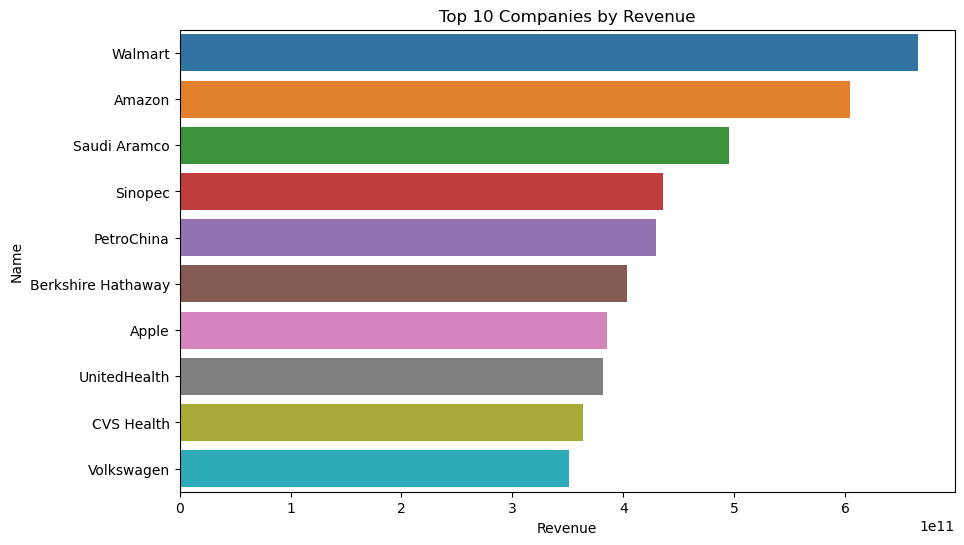

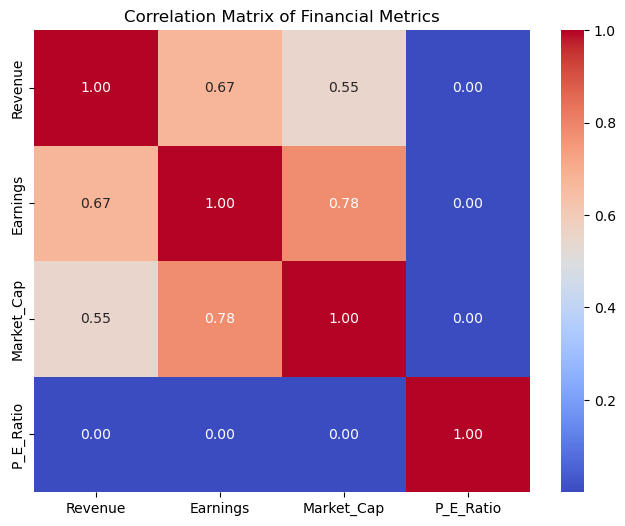

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Companies by Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenue, x='Revenue', y='Name')
plt.title('Top 10 Companies by Revenue')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Financial Metrics')
plt.show()


In [24]:
print(merged_data.columns)


Index(['Rank_rev', 'Name_rev', 'Symbol', 'Revenue', 'price (GBP)_rev',
       'country_rev', 'Rank_div', 'Name_div', 'Dividend_Yield',
       'price (GBP)_div', 'country_div', 'Rank', 'Name', 'Earnings',
       'price (GBP)', 'country', 'Rank_mcap', 'Name_mcap', 'Market_Cap',
       'price (GBP)_mcap', 'country_mcap', 'Rank_pe', 'Name_pe', 'P_E_Ratio',
       'price (GBP)_pe', 'country_pe'],
      dtype='object')


In [25]:
#Top 10 Companies by Revenue: Identify the top 10 companies based on revenue.
top_revenue = merged_data[['Name', 'Revenue']].nlargest(10, 'Revenue')
print("Top 10 Companies by Revenue:")
print(top_revenue)


Top 10 Companies by Revenue:
                 Name       Revenue
0             Walmart  665035000000
1              Amazon  604334000000
2        Saudi Aramco  495354806850
3             Sinopec  435696880608
4          PetroChina  429671599508
5  Berkshire Hathaway  402877000000
6               Apple  385603000000
7        UnitedHealth  381255000000
8          CVS Health  363248000000
9          Volkswagen  350679303398


In [26]:
#Top 10 Companies by Earnings: Identify the top 10 companies based on earnings.
top_earnings = merged_data[['Name', 'Earnings']].nlargest(10, 'Earnings')
print("Top 10 Companies by Earnings:")
print(top_earnings)


Top 10 Companies by Earnings:
                         Name      Earnings
2                Saudi Aramco  2.283780e+11
6                       Apple  1.216250e+11
20                  Microsoft  1.077870e+11
11          Alphabet (Google)  1.018210e+11
5          Berkshire Hathaway  8.890400e+10
32             JPMorgan Chase  6.878700e+10
75                     NVIDIA  6.137200e+10
42  Meta Platforms (Facebook)  6.064600e+10
59                       ICBC  5.790460e+10
1                      Amazon  5.685500e+10


In [27]:
#Top 10 Companies by Market Capitalization: Identify the top 10 companies by market capitalization.
top_market_cap = merged_data[['Name', 'Market_Cap']].nlargest(10, 'Market_Cap')
print("Top 10 Companies by Market Capitalization:")
print(top_market_cap)


Top 10 Companies by Market Capitalization:
                          Name    Market_Cap
6                        Apple  2.689903e+12
20                   Microsoft  2.427170e+12
75                      NVIDIA  2.259353e+12
11           Alphabet (Google)  1.549815e+12
1                       Amazon  1.506038e+12
2                 Saudi Aramco  1.348543e+12
42   Meta Platforms (Facebook)  1.095756e+12
5           Berkshire Hathaway  7.492296e+11
128                       TSMC  6.952419e+11
78                       Tesla  6.399479e+11


In [28]:
#Top 10 Companies by Dividend Yield: Identify the top 10 companies with the highest dividend yield.
top_dividend_yield = merged_data[['Name', 'Dividend_Yield']].nlargest(10, 'Dividend_Yield')
print("Top 10 Companies by Dividend Yield:")
print(top_dividend_yield)


Top 10 Companies by Dividend Yield:
                           Name  Dividend_Yield
9492                    LianBio       300940.00
2354             Richter Gedeon       150430.00
2480                Delek Group       117114.00
6178    LMP Automotive Holdings       106250.00
9896                       MBIA        22346.40
5420                    trivago        16142.90
8777       Arab Insurance Group        10612.90
8961              TRxADE HEALTH        10540.20
9319  Merrimack Pharmaceuticals         9980.17
2492                      Lufax         7621.30


In [29]:
#Average Revenue and Earnings by Country: Calculate the average revenue and earnings for each country.
country_performance = merged_data.groupby('country').agg({
    'Revenue': 'mean',
    'Earnings': 'mean'
}).sort_values(by='Revenue', ascending=False)
print("Average Revenue and Earnings by Country:")
print(country_performance)


Average Revenue and Earnings by Country:
                             Revenue      Earnings
country                                           
China                   1.764038e+10  2.643618e+09
South Korea             1.364231e+10  1.210048e+09
0                       1.356476e+10  8.277920e+08
Japan                   1.257893e+10  1.280267e+09
Netherlands             1.219627e+10  1.065545e+09
...                              ...           ...
USA                     1.974400e+07  2.911000e+07
British Virgin Islands  0.000000e+00 -8.268000e+07
Oman                    0.000000e+00  0.000000e+00
Pakistan                0.000000e+00  0.000000e+00
Sudan                   0.000000e+00  0.000000e+00

[80 rows x 2 columns]


In [30]:
#Correlation Analysis: Examine the correlation between different financial metrics.
correlation_matrix = merged_data[['Revenue', 'Earnings', 'Market_Cap', 'Dividend_Yield', 'P_E_Ratio']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Revenue  Earnings  Market_Cap  Dividend_Yield  P_E_Ratio
Revenue         1.000000  0.672930    0.548257        0.002766   0.001217
Earnings        0.672930  1.000000    0.777601        0.003127   0.000873
Market_Cap      0.548257  0.777601    1.000000       -0.001644   0.000366
Dividend_Yield  0.002766  0.003127   -0.001644        1.000000   0.000419
P_E_Ratio       0.001217  0.000873    0.000366        0.000419   1.000000


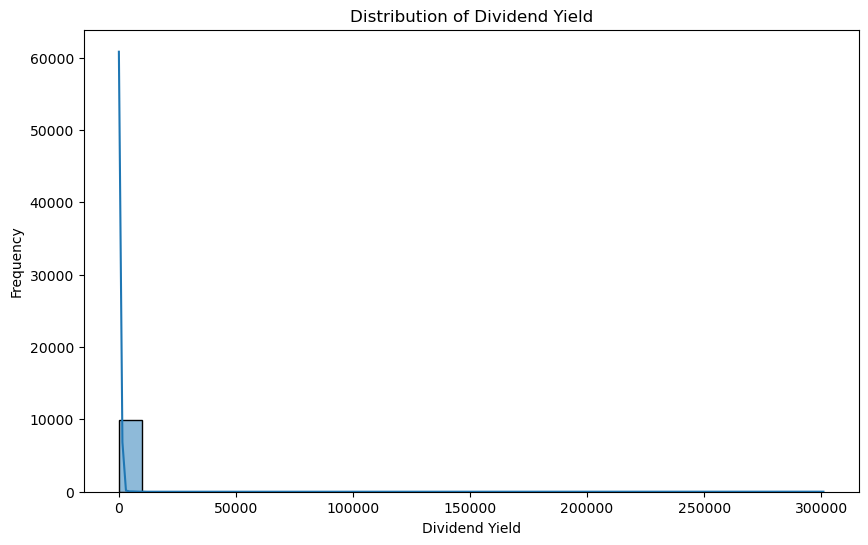

In [31]:
#Distribution of Dividend Yield: Visualize the distribution of dividend yield.import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Dividend_Yield'], bins=30, kde=True)
plt.title('Distribution of Dividend Yield')
plt.xlabel('Dividend Yield')
plt.ylabel('Frequency')
plt.show()



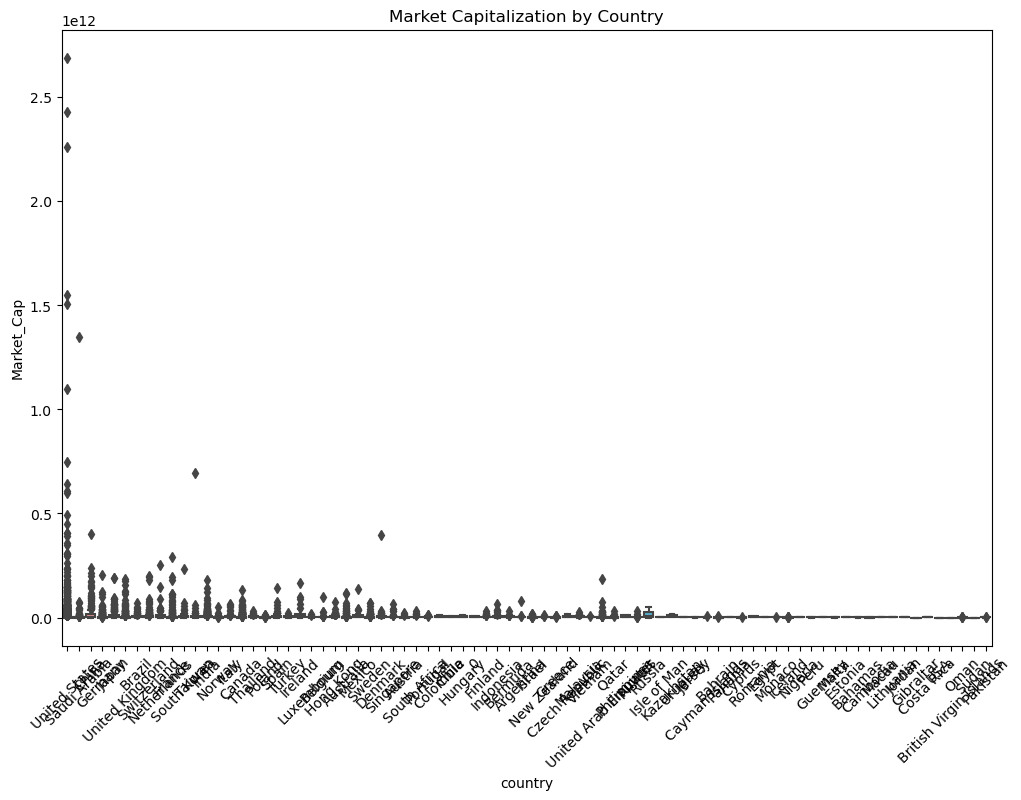

In [32]:
#Comparison of Market Cap Across Countries: Create a box plot to compare market capitalization across different countries.
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='Market_Cap', data=merged_data)
plt.title('Market Capitalization by Country')
plt.xticks(rotation=45)
plt.show()

In [33]:
#Identify Companies with High P/E Ratios: Find companies with a P/E ratio above a certain threshold.
high_pe_companies = merged_data[merged_data['P_E_Ratio'] > 20][['Name', 'P_E_Ratio']]
print("Companies with High P/E Ratios (P/E > 20):")
print(high_pe_companies)


Companies with High P/E Ratios (P/E > 20):
                                               Name  P_E_Ratio
1                                            Amazon    95.9133
6                                             Apple    34.5561
7                                      UnitedHealth    24.9415
11                                Alphabet (Google)    31.4838
16                                          Cencora    26.1231
...                                             ...        ...
9866                         Rockhopper Exploration   231.4880
9891                     Horizon Technology Finance   118.5560
9892                          Orchid Island Capital   117.8570
9904  Qatar General Insurance & Reinsurance Company    92.4492
9909                                        Quilter  1178.2400

[3056 rows x 2 columns]


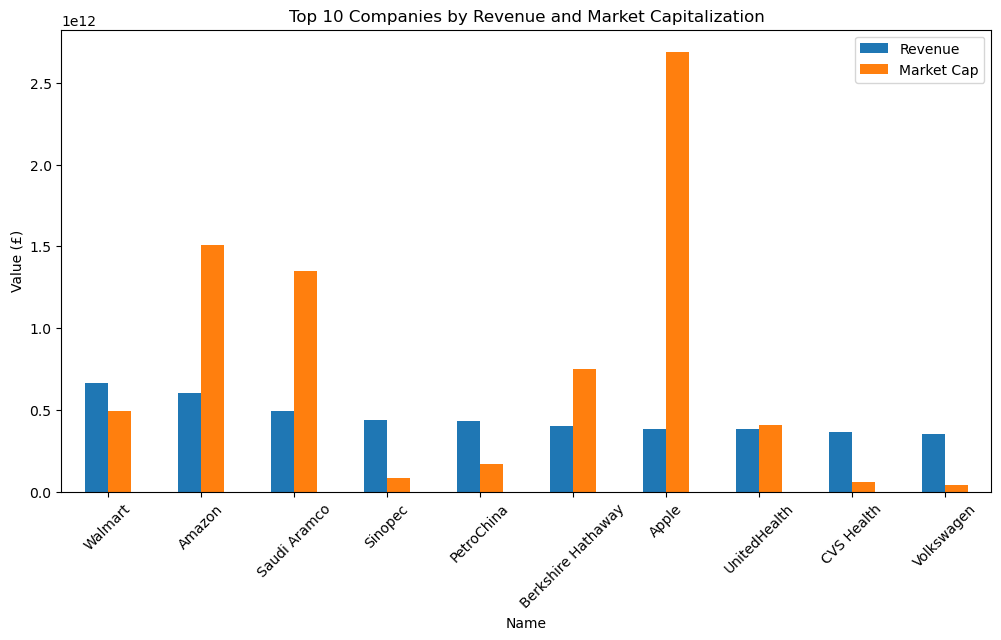

In [34]:
#top_companies = merged_data.nlargest(10, 'Revenue')[['Name', 'Revenue', 'Market_Cap']]
top_companies.set_index('Name').plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Companies by Revenue and Market Capitalization')
plt.ylabel('Value (£)')
plt.xticks(rotation=45)
plt.legend(["Revenue", "Market Cap"])
plt.show()
top_companies = merged_data.nlargest(10, 'Revenue')[['Name', 'Revenue', 'Market_Cap']]
top_companies.set_index('Name').plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Companies by Revenue and Market Capitalization')
plt.ylabel('Value (£)')
plt.xticks(rotation=45)
plt.legend(["Revenue", "Market Cap"])
plt.show()


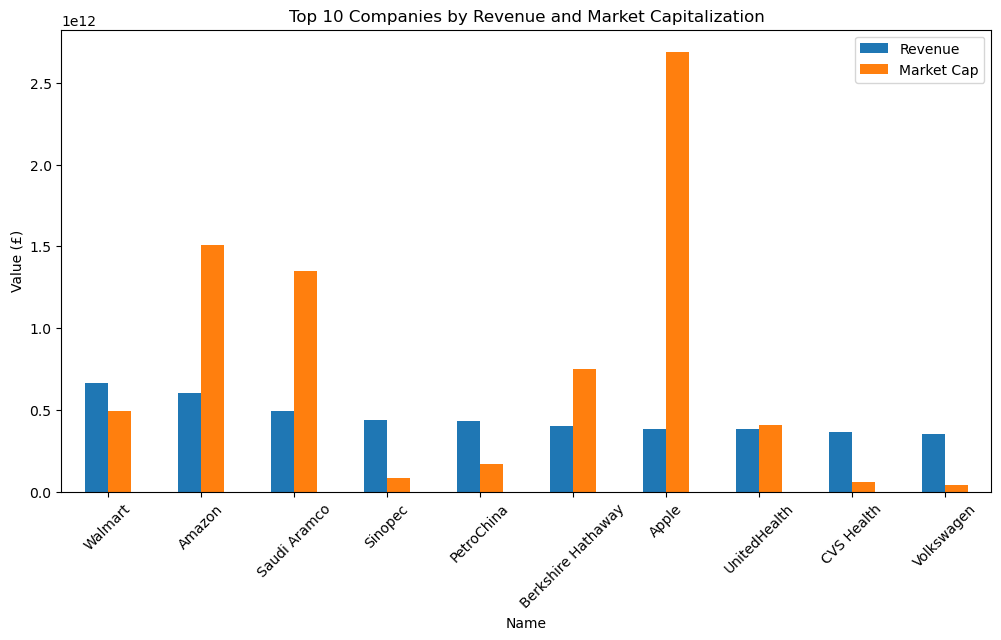

In [35]:
top_companies = merged_data.nlargest(10, 'Revenue')[['Name', 'Revenue', 'Market_Cap']]
top_companies.set_index('Name').plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Companies by Revenue and Market Capitalization')
plt.ylabel('Value (£)')
plt.xticks(rotation=45)
plt.legend(["Revenue", "Market Cap"])
plt.show()


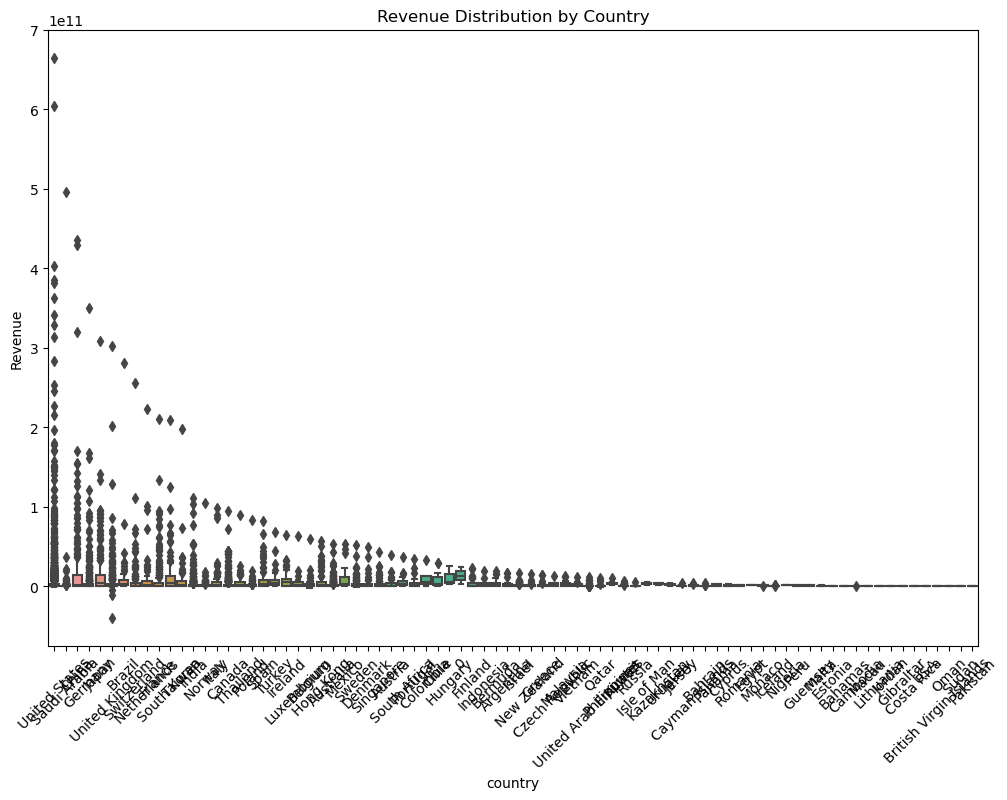

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='Revenue', data=merged_data)
plt.title('Revenue Distribution by Country')
plt.xticks(rotation=45)
plt.show()


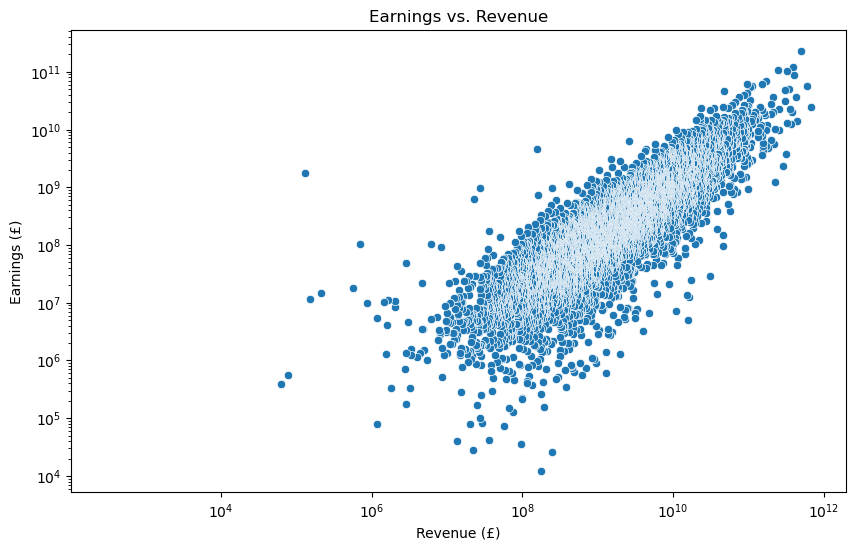

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Earnings', data=merged_data)
plt.title('Earnings vs. Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Earnings (£)')
plt.xscale('log')
plt.yscale('log')
plt.show()


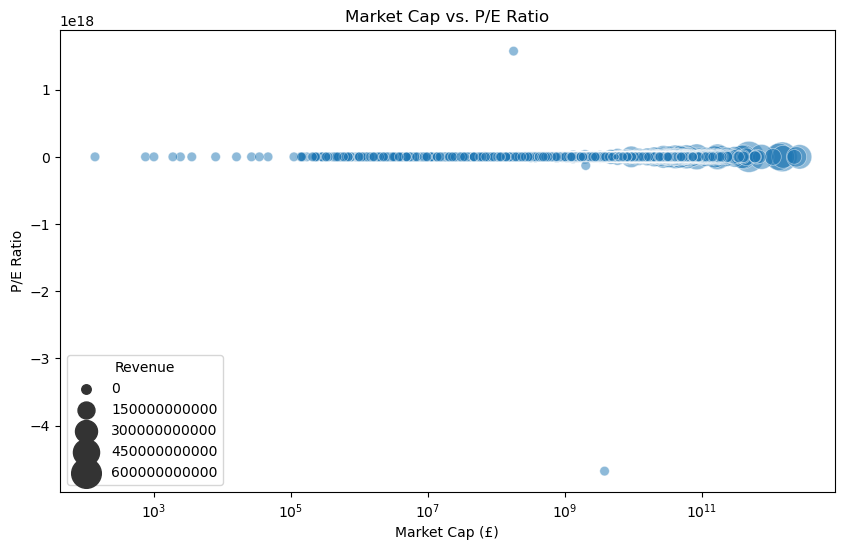

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market_Cap', y='P_E_Ratio', size='Revenue', sizes=(20, 500), alpha=0.5, data=merged_data)
plt.title('Market Cap vs. P/E Ratio')
plt.xlabel('Market Cap (£)')
plt.ylabel('P/E Ratio')
plt.xscale('log')
plt.show()
